# ISVR1032 Acoustics I
## Different boundary conditions
### Matthew Wright mcmw@isvr.soton.ac.uk

In [1]:
%pylab
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


## Introduction
So far the only boundary condition we've applied to the string has been the fixed end, and the relationship between the incident and reflected waves was very simple. In this notebook we'll study a semi-infinite string whose end is connected to a mass, which is in turn connected to a fixed point via a spring and a damper in parallel. The motion of the mass is in the direction of the string's transverse motion - it might help to thtink of the mass as sliding up and down a vertical pole while the string is horizontal. This is a model of, among other things, a guitar string where the mass-spring-damper system behaves like the bridge.

## Mass-spring-damper system

You've already studied this single-degree-of-freedom system in the Dynamics part of FEEG1002 but we'll only need to briefly recap it. We'll have to use different names for the variables, however.
- We'll use $s$ rather than $k$ for the stiffness of the spring so that we don't confuse it with the wavenunber. 
- We'll use $r$ rather than $c$ for the coefficient of viscous damping so that we don't confuse it with the wave speed. 
- We'll use $y$ for the displacement of the mass because $x$ is the distance along the string. Once we couple it to the string we'll call it $y_m$ but for now we'll just write $y$.

The system is governed by a linear second-order inhomogeneous ordinary differential equation:

$$
m\ddot{y} + r\dot{y} + sy = f(t)
$$

where a dot indicates differentiation with respect to $t$. If the force $f(t)$ is an arbitrary function of time the best we can hope to do is write the solution $y_m(t)$ as an integral involving $f(t)$. But if we restrict $f(t)$ to being a sinusoid, i.e.

$$
f(t) = \Re\left\{\tilde{F}{\mathrm e}^{{\mathrm j}\omega t}\right\}
$$

then, because the system is linear, the resulting displacement will also be sinusoidal:

$$
y(t) = \Re\left\{\tilde{Y}{\mathrm e}^{{\mathrm j}\omega t}\right\}
$$

and the ratio of the displacement and force amplitudes will be a complex number depending on $\omega$ and the other parameters of the system known as the **receptance**, an example of a **frequency response function** (FRF).

If we define $\tilde{y}(t) = \tilde{Y}{\mathrm e}^{{\mathrm j}\omega t}$ and $\tilde{f}(t) = \tilde{F}{\mathrm e}^{{\mathrm j}\omega t}$ we can write a complex version of our ODE

$$
m\ddot{\tilde{y}} + r\dot{\tilde{y}} + s\tilde{y} = \tilde{f}(t).
$$

Substituting the definitions of $\tilde{y}(t)$ and $\tilde{f}(t)$ makes the dervivatives  easy and we can write

$$
-\omega^2 m \tilde{Y} + \mathrm{j}\omega r\tilde{Y} + s\tilde{Y} = \tilde{F}
$$

so the complex receptance is

$$
\tilde{Q} = \frac{\tilde{Y}}{\tilde{F}} = \frac{1}{-\omega^2 m + \mathrm{j}\omega r + s}.
$$

(this isn't the standard symbol for receptance but it avoids conflict). The mobility (velocity over force) is $\mathrm{j}\omega/(-\omega^2 m + \mathrm{j}\omega r + s)$ and the impedance (force over velocity) is

$$
\begin{align}
\tilde{Z} &= \frac{-\omega^2 m + \mathrm{j}\omega r + s}{\mathrm{j}\omega}\\
&= r + \mathrm{j}(\omega m - s/\omega)
\end{align}
$$



#### Worked example
Plot the receptance of a mass-spring-damper system with mass 10 grams, stiffness 1000 Newtons per metre and damping coefficient one Newton-second per metre up to 200 Hz.

#### Solution
Because we've been asked to plot it in Hz we'll create an array of linear frequencies to use in the `plot` statement, and convert to an array of radial frequencies for calculations. 

In [2]:
%matplotlib

Using matplotlib backend: Qt4Agg


In [3]:
m = 0.01
s = 2000
r = 1
j = 1j

f = linspace(0, 200, 1000)
omega = 2*pi*f
Q = 1/(-omega**2*m + j*omega*r + s)   # Receptance

fig = figure()
ax = fig.gca(projection='3d')
plot(f, real(Q), imag(Q), 'm-')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Real part of receptance [m/N]')
ax.set_zlabel('Imaginary part of receptance [m/N]')

By adjusting the viewpoint on these 3D axes we can see 2D graphs of the real and imaginary parts of the receptance vs. frequency, or from a third viewpoint we can see the Nyquist plot. Keep this figure to compare with the next one.

An alternative way of plotting an FRF is a **Bode plot** which consists of graphs of the modulus and phase of the receptance. We'll plot these inline, using `subplot` to put the plots together. 

In [4]:
%matplotlib inline

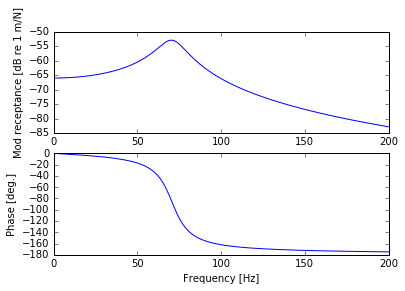

In [5]:
subplot(2, 1, 1)
plot(f, 20*log10(abs(Q)))
ylabel('Mod receptance [dB re 1 m/N]')

subplot(2, 1, 2)
plot(f, angle(Q)*180/pi)
ylabel('Phase [deg.]')
xlabel('Frequency [Hz]')

It might seem strange that the phase of the receptance only varies by $-180^\circ$ as we go from below the resonance frequency to above it, whereas the Nyquist plot shows a complete circle. Examine the 3D plot to see how to resolve this paradox [hint: where is the origin in the Nyquist plot?]

## Coupled string and mass

Now we can consider a semi-infite string lying along $x \le 0$, with its end attached to the mass of our one degree-of-freedom system. The displacement of the string is $y(x,t)$ and the displacement of the mass is $y_m(t) = y(0,t)$. The mass still obeys the same ODE, but the forcing signal $f(t)$ now depends on the gradient of the string at its end:

$$
m\ddot{y}_m + r\dot{y}_m + sy_m = -\tau\frac{\partial y}{\partial x}(0,t)
$$

This is an ODE for the mass but since $y_m(t) = y(0,t)$ it's also a *bounday condition* for the PDE that the string obeys. We are studying a continuous system (the string, which obeys a PDE) that is **coupled** to a lumped system (the mass, which obeys an ODE). 

FRFs such as receptance and impedance provide a way to couple linear systems. Working at a single frequency allows us to use a polynomial in $\omega$ rather than time derivatives.

Before we proceed to couple the equations we'll examine the effect on the wave equation of working at a single frequency.

## Single frequency wave equation

We've previously looked at single frequency solutions of the string's governing equation, but now we'll formally write the equation they obey, using the complex formulation. We'll begin with the wave equation

$$ 
\frac{\partial^2 y}{\partial x^2} - \frac{1}{c^2}\frac{\partial^2 y}{\partial t^2} = 0.
$$

If

$$
\tilde{y}(x,t) = \tilde{Y}(x)\mathrm{e}^{\mathrm{j}\omega t} \tag{1}
$$

obeys the same wave equation with complex variable i.e.:

$$ 
\frac{\partial^2 \tilde{y}}{\partial x^2} - \frac{1}{c^2}\frac{\partial^2 \tilde{y}}{\partial t^2} = 0, \tag{2}
$$

then we must have $y(x,t) = \Re\{\tilde{y}(x,t)\}$ because $\Re\{\}$ is a linear operation. Substituting  $(1)$ into $(2)$ gives

$$ 
\frac{\partial^2}{\partial x^2}\left[\tilde{Y}(x)\mathrm{e}^{\mathrm{j}\omega t}\right] - \frac{1}{c^2}\frac{\partial^2}{\partial t^2}\left[\tilde{Y}(x)\mathrm{e}^{\mathrm{j}\omega t}\right] = 0.
$$

Since $\tilde{y}(x,t)$ is separable we can take its temporal factor out of the first bracket, and its spatial factor out of the second one:

$$ 
\frac{\partial^2}{\partial x^2}\left[\tilde{Y}(x)\right]\times \mathrm{e}^{\mathrm{j}\omega t} - \frac{1}{c^2}\frac{\partial^2}{\partial t^2}\left[\mathrm{e}^{\mathrm{j}\omega t}\right]\times\tilde{Y}(x) = 0.
$$

The $t$-derivative is easy, giving

$$ 
\frac{\partial^2\tilde{Y}}{\partial x^2}\mathrm{e}^{\mathrm{j}\omega t} + \frac{\omega^2}{c^2}\tilde{Y}(x)\mathrm{e}^{\mathrm{j}\omega t} = 0,
$$

and we can divide through by $\mathrm{e}^{\mathrm{j}\omega t}$ to give

$$ 
\frac{\partial^2\tilde{Y}}{\partial x^2} + \frac{\omega^2}{c^2}\tilde{Y} = 0.
$$

We can recognise $\omega/c$ as the wavenumber $k$, so we have 

$$ 
\frac{\partial^2\tilde{Y}}{\partial x^2} + k^2\tilde{Y} = 0.
$$

Since time doesn't occur in this equation we only have one independent variable, so we can use ordinary derivatives:

$$ 
\frac{\mathrm{d}^2\tilde{Y}}{\mathrm{d} x^2} + k^2\tilde{Y} = 0.
$$

This is the one-dimensional **Helmholtz Equation** which must be obeyed by the spatial factors of single frequency solutions of the wave equation. We've written it for a complex dependent variable but the real part of $\tilde{Y}(x)$ must obey an equation of the same form.

When there are two or three spatial dimensions the Helmholtz equation corresponding to the two or three-dimensional wave equation will be a PDE.

#### Exercise

1. Show how a combination of positive and negative-going harmonic waves have a complex spatial factor that can be written 
$$
\tilde{Y}(x) = \tilde{A}\mathrm{e}^{-\mathrm{j}kx} + \tilde{B}\mathrm{e}^{\mathrm{j}kx} \tag{3}
$$
2. Show that this spatial factor satisfies the Helmholtz equation.

## String reflections

Suppose now that time-harmonic waves of a given amplitude are travelling along the string towards the mass. The reflected wave will also be time-harmonic so the wavefield will have the form of $(3)$. What will be the amplitude of the reflected wave and how will it depend on frequency?

The mass has receptance 
$$
\frac{\tilde{Y}_m}{\tilde{F}} = \frac{1}{-\omega^2 m + \mathrm{j}\omega r + k}.
$$

The amplitude of the mass displacement $\tilde{Y}_m$ must also be the amplitude of the string displacement at $x = 0$ i.e. 

$$
\tilde{Y}_m = \tilde{Y}(0) = \tilde{A} + \tilde{B}
$$

(setting $x=0$ in $(3)$). The amplitude of the sinusoidal force exerted by the string on the mass is 

$$
\tilde{F} = -\tau  \frac{\mathrm{d}\tilde{Y}}{\mathrm{d}x}(0)
$$

but from $(3)$

$$
\frac{\mathrm{d}\tilde{Y}}{\mathrm{d}x} = -\mathrm{j}k\tilde{A}\mathrm{e}^{-\mathrm{j}kx} + \mathrm{j}k\tilde{B}\mathrm{e}^{\mathrm{j}kx}
$$

so

$$
\frac{\mathrm{d}\tilde{Y}}{\mathrm{d}x}(0) = -\mathrm{j}k(\tilde{A} - \tilde{B}),
$$

and

$$
\tilde{F} = \mathrm{j}\tau k(\tilde{A} - \tilde{B}).
$$

The receptance is  therefore 

$$
\tilde{Q} = \frac{\tilde{Y}(0)}{\tilde{F}} = \frac{1}{\mathrm{j}\tau k}\left(\frac{\tilde{A} + \tilde{B}}{\tilde{A} - \tilde{B}}\right)
$$

which can be rearranged to

$$
 \frac{\tilde{B}}{\tilde{A}} = 
 \frac{\mathrm{j}\tau k\tilde{Q} - 1}{\mathrm{j}\tau k\tilde{Q} + 1} = 
 \frac{\tilde{Q} + \mathrm{j}/\tau k}{\tilde{Q} - \mathrm{j}/\tau k} .
$$

This is the complex reflection coefficient for this boundary. We could substitute our expression for the receptance $\tilde{Q}$ in terms of $m$, $r$ and $s$ if we wanted.

#### Exercise
For a string with a tension of 80 Newtons and wave speed 200 metres per second, terminated by the mass-spring-damper equation described above, plot the modulus of the reflection coefficient as a function of frequency. Before you plot the graph try  to predict how the strength of the reflected wave will vary around the mass's resonance frequecy.

## Receptance and impedance of a semi-infinite string

Since the receptance of the mass was such a useful concept for the mass, could we define the receptance of the string? In other words, if we apply a harmonic force to the string, how big would the resulting displacement be?

Suppose the end of a semi-infinite horizontal string on $x \ge 0$ is attached to a massless collar that slides without friction on a vertical pole, and we applied  a force $\tilde{f}(t) = \tilde{F}\mathrm{e}^{\mathrm{j}\omega t}$ to the collar. It would generate a harmonic wave traveling away from it, so

$$
\tilde{y}(x,t) = \tilde{A}\mathrm{e}^{\mathrm{j}(\omega t - kx)}
$$

and

$$
\tilde{Y}(x) = \tilde{A}\mathrm{e}^{-\mathrm{j}kx}
$$

but what would $\tilde{A}$, the amplitude of that wave, be?

Since the collar has no mass, and there is no friction, the only forces acting on it are the applied force and the force from the string which must be equal and opposite, i.e.

$$
\tilde{F} - \tau \frac{\mathrm{d}\tilde{Y}}{\mathrm{d}x}(0) = 0.
$$

Since we know the form of $\tilde{Y}(x)$ even if we don't know it's amplitude we can find its gradient and then set $x=0$ to give

$$
\tilde{F} + \mathrm{j}\tau k \tilde{A} = 0
$$

so the receptance (displacement amplitude over force) is

$$
\frac{\tilde{A}}{\tilde{F}} = \frac{\mathrm{j}}{\tau k}.
$$

In many applications it turns out to be useful to know the string's *mechanical impedance* which is force over velocity. If the displacement at $x$ is $\tilde{Y}(x)\mathrm{e}^{\mathrm{j}\omega t}$ then the velocity will be $\mathrm{j}\omega\tilde{Y}(x)\mathrm{e}^{\mathrm{j}\omega t}$ so 

$$
\tilde{Z} = \frac{\tilde{F}}{\mathrm{j}\omega\tilde{A}} = \frac{1}{\mathrm{j}\omega} \times \frac{\tau k}{\mathrm{j}} = -\frac{\tau}{c},
$$

since $k = \omega/c$. We can use the formula for the wave speed $c = \sqrt{\tau/\mu}$ to obtain

$$
\tilde{Z} = \sqrt{\tau \mu}.
$$

We can think of the mechanical impedance, or receptance, as the 'rate of exchange' between force and vibration. The higher the impedance more 'expensive' vibration is; it takes a lot morce force to make a tight heavy string vibrate as much as a light slack one. It's possible for two strings to have the same wavespeed but different impedances, and vice versa.

#### Exercise
The fact that the impedance of the string is independent of frequency suggests that it should be possible to derive it without requiring single-frequency solutions. Use the wave equation in the form
    
$$ 
\tau \frac{\partial^2 y}{\partial x^2} = \mu\frac{\partial^2 y}{\partial t^2},
$$

and the d'Alembert solution for a positive-going wave $y(x,t) = f(t - x/c)$ to do so.